In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE




data = pd.read_csv("/content/creditcard.csv")
print("There are " + str(len(data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(data.columns)) + " variables in the dataset.")
n_replicas = 10

big_data = pd.DataFrame(np.repeat(data.values, n_replicas, axis=0), columns=data.columns)

print("\nThere are " + str(len(big_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_data.columns)) + " variables in the dataset.\n")
print(data.head())

There are 174418 observations in the credit card fraud dataset.
There are 31 variables in the dataset.

There are 1744180 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.90941

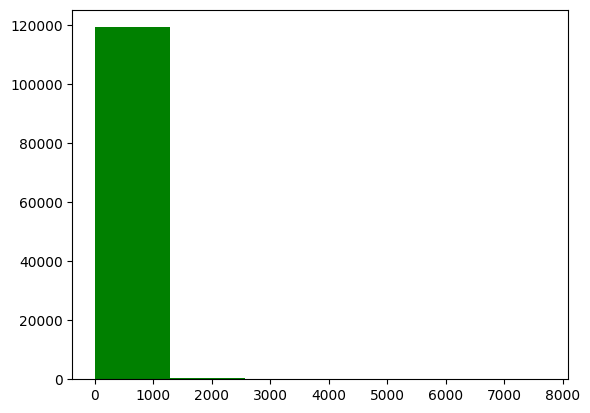

Minimum amount value is  nan
Maximum amount value is  nan
90% of the transactions have an amount less or equal than  nan


In [ ]:
plt.hist(big_data.Amount.values,6,histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(big_data.Amount.values))
print("Maximum amount value is ", np.max(big_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(data.Amount.values, 90))

Text(0.5, 1.0, 'Distribution plot of time coloumn')

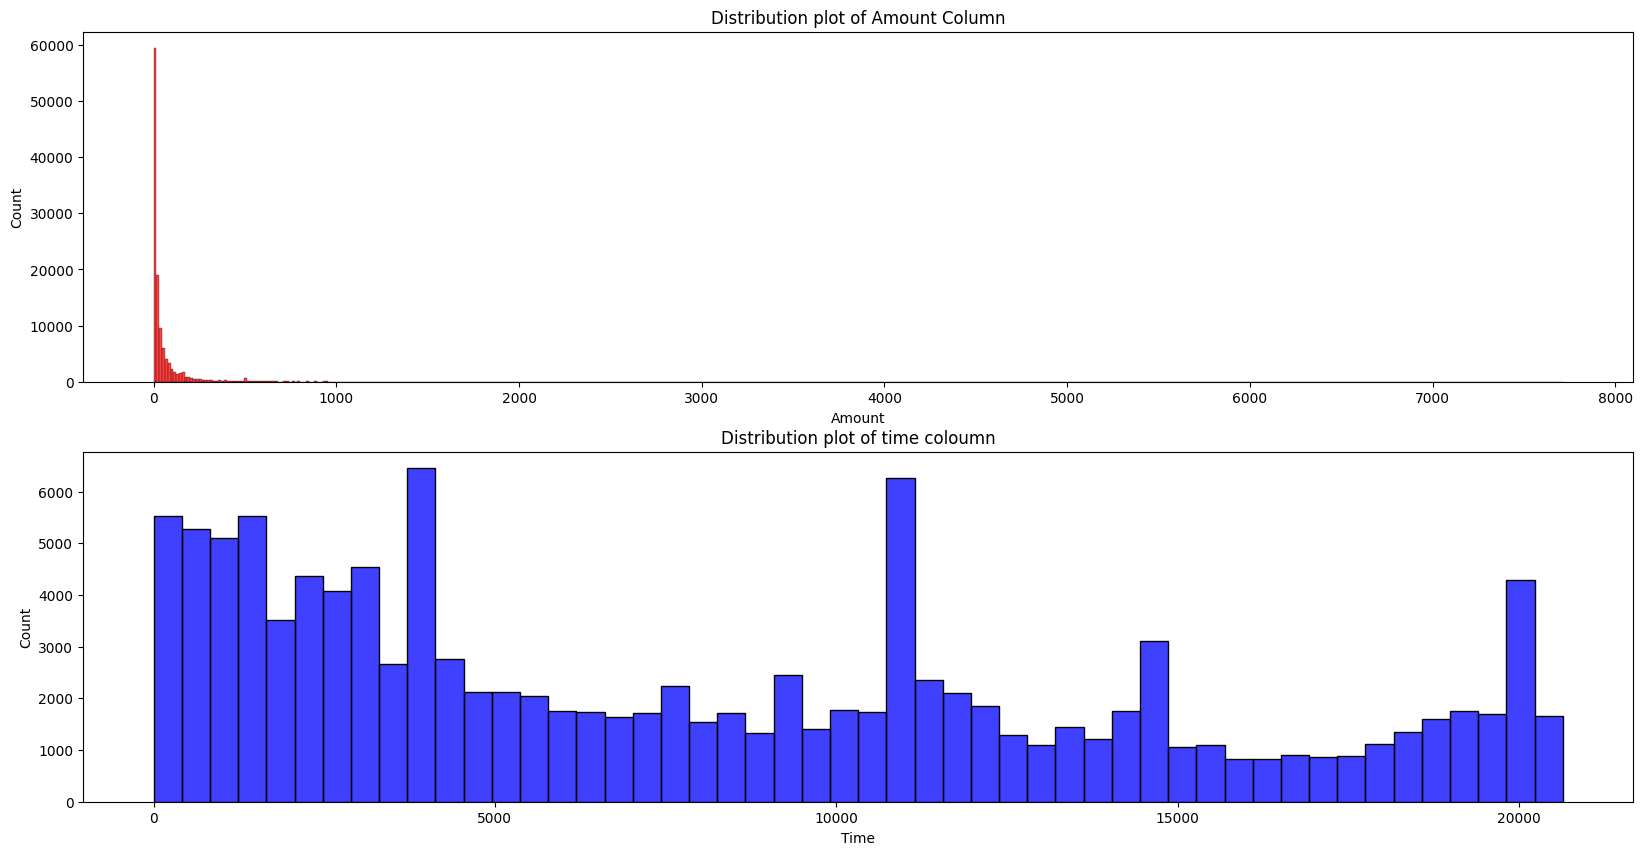

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
sns.histplot(big_data.Amount, bins = 500, color= 'r', ax = ax[0])
ax[0].set_title("Distribution plot of Amount Column")
sns.histplot(big_data.Time, bins = 50, color = 'b', ax=ax[1])
ax[1].set_title("Distribution plot of time coloumn")

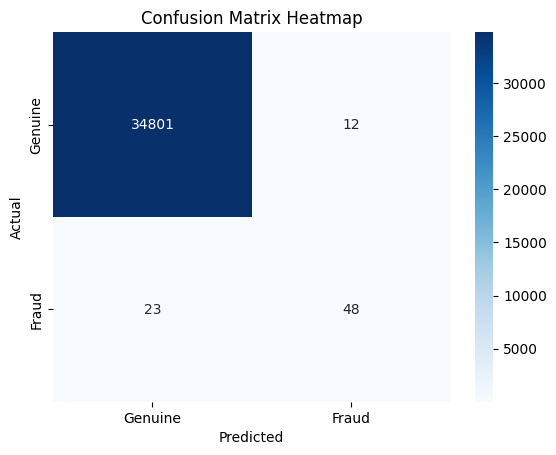

In [44]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [25]:
data = data.dropna()

scaler = StandardScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

In [26]:
X= data.drop('Class', axis=1)
y = data['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_retrained, y_train_retrained = smote.fit_resample(X_train, y_train)
X_train_retrained
y_train_retrained

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
278481    1.0
278482    1.0
278483    1.0
278484    1.0
278485    1.0
Name: Class, Length: 278486, dtype: float64

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_retrained, y_train_retrained)

In [31]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[34801    12]
 [   23    48]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34813
         1.0       0.80      0.68      0.73        71

    accuracy                           1.00     34884
   macro avg       0.90      0.84      0.87     34884
weighted avg       1.00      1.00      1.00     34884



In [33]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

F1 Score: 0.73
Precision: 0.80
Recall: 0.68
